# Curs - 08 - Analiza de date exploratorie



   1. Statistici descriptive univariate si distributia datelor
   2. Tabele de contingentă pentru analiza asociațiilor
   3. Analiza corelatiilor



In [3]:
#!pip install matplotlib
#!pip install seaborn
#!pip install scipy
#!pip install statsmodels

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

In [140]:
df = pd.read_csv("all_details_UAT.csv")
df.head(3)

,SIRUTA,studyFormationsCount,studentsCount,personnelCount,idSchool,county,locality,propertyForm,Populatie
0,1017,11.519231,13412,1711,52,ALBA,ALBA IULIA,2,74802.0
1,1071,3.000000,313,37,7,ALBA,CIUGUD,1,3084.0
2,1151,14.333333,681,121,3,ALBA,ABRUD,1,5293.0


In [141]:
df = df.copy()
df.rename(columns = {'idSchool':'school_no'}, inplace = True)

In [142]:
df.columns

Index(['SIRUTA', 'studyFormationsCount', 'studentsCount', 'personnelCount',
       'school_no', 'county', 'locality', 'propertyForm', 'Populatie'],
      dtype='object')

## 1. EXPLORAREA DISTRIBUTIILOR

summary_stats = df.describe()## 1. Exploarea distributiilor

In [143]:
df.describe()

,SIRUTA,studyFormationsCount,studentsCount,personnelCount,school_no,propertyForm,Populatie
count,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3170.000000
mean,94861.267108,7.498124,912.679596,107.233050,5.964995,1.056134,6326.125868
std,50669.455383,3.633079,6095.728923,678.151965,14.877259,0.230216,20097.397088
min,1017.000000,2.000000,0.000000,0.000000,1.000000,1.000000,264.000000
25%,51777.500000,5.000000,165.000000,26.000000,3.000000,1.000000,2050.250000
50%,96717.000000,6.300000,278.000000,35.000000,4.000000,1.000000,3078.000000
75%,139376.000000,9.000000,502.000000,55.000000,6.000000,1.000000,4926.750000
max,180091.000000,46.500000,289830.000000,31451.000000,657.000000,2.000000,385592.000000


In [144]:
var = "studentsCount"

In [145]:
# Calculați asimetria (skewness) și kurtosis pentru a evalua forma distribuției
asimetrie = skew(df[var])
kurt = kurtosis(df[var])
print(f'asimetrie:{asimetrie}')
print(f'kustosis:{kurt}')

asimetrie:35.343910479483405
kustosis:1602.3153402408814


In [146]:
# Testați normalitatea datelor folosind testul Shapiro-Wilk
stat_shapiro, p_value_shapiro = shapiro(df[var])

print('stat_shapiro:', stat_shapiro)
print('p_value_shapiro:', p_value_shapiro)


stat_shapiro: 0.07771188020706177
p_value_shapiro: 0.0


#### FUNCTIE PENTRU STATISTICI DESCRIPTIVE

In [150]:

def descriptive_statistics(df, var):
    # Calculate mean, median, mode
    median_val = df[var].median()
    mode_val = df[var].mode()[0]  # mode() returns a Series, we take the first element
    
    # Drop missing values
    df_no_missing = df.dropna(subset=[var])
    
    # Calculate skewness and kurtosis
    asymmetry = skew(df_no_missing[var])
    kurt = kurtosis(df_no_missing[var])
    
    # Test normality using the Shapiro-Wilk test
    stat_shapiro, p_value_shapiro = shapiro(df_no_missing[var])
    
    print(f'Descriptive statistics for {var}:')
    
    # Return a dictionary with the results
    return {
        'median': median_val,
        'mode': mode_val,
        'skewness': asymmetry,
        'kurtosis': kurt,
        'shapiro_stat': stat_shapiro,
        'shapiro_p_value': p_value_shapiro
    }




In [151]:
descriptive_statistics(df,var)

Descriptive statistics for studentsCount:


{'median': 278.0,
 'mode': 182,
 'skewness': 35.343910479483405,
 'kurtosis': 1602.3153402408814,
 'shapiro_stat': 0.07771188020706177,
 'shapiro_p_value': 0.0}

### HISTOGRAMAavem suficiente dovezi să respingem ipoteza că datele tale urmează o distribuție normală.

### HISTOGRAMA

Text(0, 0.5, 'Frecvență')

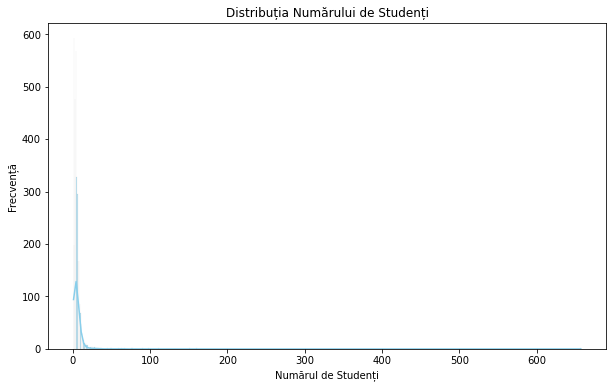

In [152]:
# Desenați histograma pentru distribuția datelor
plt.figure(figsize=(10, 6))
sns.histplot(df['school_no'], kde=True, color='skyblue')
plt.title('Distribuția Numărului de Studenți')
plt.xlabel('Numărul de Studenți')
plt.ylabel('Frecvență')

In [50]:
df.head()

,SIRUTA,studyFormationsCount,studentsCount,personnelCount,idSchool,county,locality,propertyForm,Populatie
0,1017,11.519231,13412,1711,52,ALBA,ALBA IULIA,2,74802.0
1,1071,3.000000,313,37,7,ALBA,CIUGUD,1,3084.0
2,1151,14.333333,681,121,3,ALBA,ABRUD,1,5293.0
3,1213,11.157895,3639,460,19,ALBA,AIUD,1,25523.0
4,1348,12.263158,3805,488,19,ALBA,BLAJ,2,20686.0


#### GROUP BY JUD

In [154]:
aggregations = {'studyFormationsCount': 'mean',
               'studentsCount':'sum',
               'personnelCount':'sum',
               'school_no':'count',
                'SIRUTA' : 'count',
                'propertyForm':'nunique',
               'Populatie': 'sum'}

df_jud = df.groupby(['county']).agg(aggregations).reset_index()
df_jud.head()

,county,studyFormationsCount,studentsCount,personnelCount,school_no,SIRUTA,propertyForm,Populatie
0,ALBA,5.513751,48417,6359,77,77,2,374599.0
1,ARAD,6.728434,60927,7145,78,78,2,470558.0
2,ARGES,7.827442,30868,4016,80,80,2,322833.0
3,ARGEŞ,10.309093,55678,6189,21,21,2,310427.0
4,BACAU,8.362614,45907,5209,76,76,2,448371.0


### HISTOGRAMA

Text(0, 0.5, 'Frecvență')

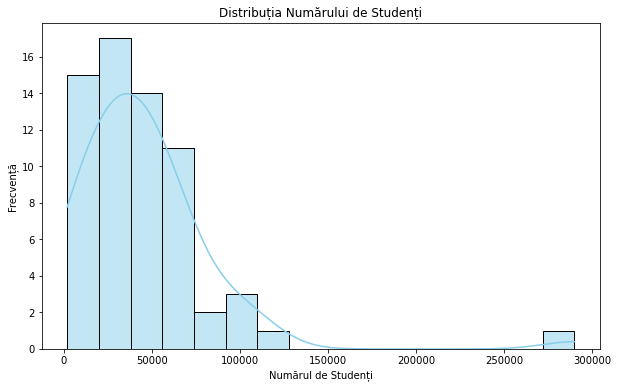

In [155]:
var = "studentsCount"
# Desenați histograma pentru distribuția datelor
plt.figure(figsize=(10, 6))
sns.histplot(df_jud[var], kde=True, color='skyblue')
plt.title('Distribuția Numărului de Studenți')
plt.xlabel('Numărul de Studenți')
plt.ylabel('Frecvență')

In [156]:
top_5_UAT = df.nlargest(5, 'school_no')
#top_5_UAT = df.sort_values(by='idSchool', ascending=False).head(5)
top_5_UAT

#!!!!!!!!!!!1 rezolva cu populatia, NaN si numele la Bucuresti


,SIRUTA,studyFormationsCount,studentsCount,personnelCount,school_no,county,locality,propertyForm,Populatie
3110,179132,17.671233,289830,31451,657,MUNICIPIUL BUCURESTI,BUCURESTI SECTORUL 1,2,NaN
849,54975,15.537500,59159,7395,160,CLUJ,CLUJ-NAPOCA,2,326362.0
1557,95060,15.348387,58131,6930,155,IAŞI,IAŞI,2,385592.0
930,60419,14.019868,50328,5431,151,CONSTANŢA,CONSTANŢA,2,312392.0
2713,155243,16.219697,51137,6024,132,TIMIŞ,TIMIŞOARA,2,326886.0


In [157]:
df['locality'] = df['locality'].replace('BUCURESTI SECTORUL 1', 'BUCURESTI')
df.loc[df['locality'] == 'BUCURESTI', 'Populatie'] = 2144869


In [158]:
# clean
df["county"].unique()

array(['ALBA', 'ARAD', 'ARGEŞ', 'ARGES', 'BACĂU', 'BACAU', 'BIHOR',
       'BISTRIŢA-NASAUD', 'BISTRIŢA-NĂSĂUD', 'BISTRITA-NASAUD',
       'BOTOŞANI', 'BOTOSANI', 'BRAŞOV', 'BRASOV', 'BRĂILA', 'BRAILA',
       'BUZĂU', 'BUZAU', 'CARAS-SEVERIN', 'CARAŞ-SEVERIN', 'CLUJ',
       'CONSTANŢA', 'CONSTANTA', 'COVASNA', 'DÂMBOVIŢA', 'DIMBOVITA',
       'DOLJ', 'GALAŢI', 'GALATI', 'GORJ', 'HARGHITA', 'HUNEDOARA',
       'CĂLĂRAŞI', 'CALARASI', 'IALOMIŢA', 'IAŞI', 'IASI', 'GIURGIU',
       'ILFOV', 'MARAMUREŞ', 'MARAMURES', 'MEHEDINŢI', 'MEHEDINTI',
       'MURES', 'MUREŞ', 'NEAMŢ', 'NEAMT', 'OLT', 'PRAHOVA', 'SATU MARE',
       'SATU_MARE', 'SĂLAJ', 'SALAJ', 'SIBIU', 'SUCEAVA', 'TELEORMAN',
       'TIMIŞ', 'TIMIS', 'TULCEA', 'VASLUI', 'VILCEA', 'VÂLCEA',
       'VRANCEA', 'MUNICIPIUL BUCURESTI'], dtype=object)

In [159]:
# INLOCUIRE DIAG+CRITICE
diacr = {"Ă":"A", "Ş":"S","Ţ":"T","Â":"A","Î":"I"}
# Create a translation table
translation_table = str.maketrans(diacr)
# Apply the translation to the specified column
df["county"] = df["county"].str.translate(translation_table)

# Dicționar cu perechi de înlocuire pentru județe
replace_counties = {'DIMBOVITA': 'DAMBOVITA', 'SATU_MARE': 'SATU MARE', 'VILCEA': 'VALCEA','MUNICIPIUL BUCURESTI':'BUCURESTI'}

# Înlocuiește numele județelor în DataFrame
df['county'] = df['county'].replace(replace_counties)

# Înlocuiește numele localității cu 'Bucharest' în DataFrame
#df['county'] = df['county'].replace({'DIMBOVITA': 'DAMBOVITA'})


In [162]:
aggregations = {'studyFormationsCount': 'mean',
               'studentsCount':'sum',
               'personnelCount':'sum',
               'school_no':'count',
                'SIRUTA' : 'count',
                'propertyForm':'nunique',
               'Populatie': 'sum'}

df_jud = df.groupby(['county']).agg(aggregations).reset_index()
df_jud.head()

,county,studyFormationsCount,studentsCount,personnelCount,school_no,SIRUTA,propertyForm,Populatie
0,ALBA,5.513751,48417,6359,77,77,2,374599.0
1,ARAD,6.728434,60927,7145,78,78,2,470558.0
2,ARGES,8.343429,86546,10205,101,101,2,633260.0
3,BACAU,8.624617,87940,10138,93,93,2,740793.0
4,BIHOR,6.353529,88344,10659,101,101,2,616974.0


In [163]:
# clean
df["county"].unique()

array(['ALBA', 'ARAD', 'ARGES', 'BACAU', 'BIHOR', 'BISTRITA-NASAUD',
       'BOTOSANI', 'BRASOV', 'BRAILA', 'BUZAU', 'CARAS-SEVERIN', 'CLUJ',
       'CONSTANTA', 'COVASNA', 'DAMBOVITA', 'DOLJ', 'GALATI', 'GORJ',
       'HARGHITA', 'HUNEDOARA', 'CALARASI', 'IALOMITA', 'IASI', 'GIURGIU',
       'ILFOV', 'MARAMURES', 'MEHEDINTI', 'MURES', 'NEAMT', 'OLT',
       'PRAHOVA', 'SATU MARE', 'SALAJ', 'SIBIU', 'SUCEAVA', 'TELEORMAN',
       'TIMIS', 'TULCEA', 'VASLUI', 'VALCEA', 'VRANCEA', 'BUCURESTI'],
      dtype=object)

## ADD NEW COLUMNS - FEATURE ENGINEERING

- student / Population - stud_pop
- personnel / Population - personnel_pop
- student / Personnel - stud_personnel


In [164]:
df.columns

Index(['SIRUTA', 'studyFormationsCount', 'studentsCount', 'personnelCount',
       'school_no', 'county', 'locality', 'propertyForm', 'Populatie'],
      dtype='object')

In [165]:
df['stud_pop'] = df['studentsCount'] / df['Populatie']
df['personnel_pop'] = df['personnelCount'] / df['Populatie']
df['stud_personnel'] = df['studentsCount'] / df['personnelCount']

df.head(3)

,SIRUTA,studyFormationsCount,studentsCount,personnelCount,school_no,county,locality,propertyForm,Populatie,stud_pop,personnel_pop,stud_personnel
0,1017,11.519231,13412,1711,52,ALBA,ALBA IULIA,2,74802.0,0.179300,0.022874,7.838691
1,1071,3.000000,313,37,7,ALBA,CIUGUD,1,3084.0,0.101492,0.011997,8.459459
2,1151,14.333333,681,121,3,ALBA,ABRUD,1,5293.0,0.128660,0.022860,5.628099


### HISTOGRAMA

Text(0, 0.5, 'Frecvență')

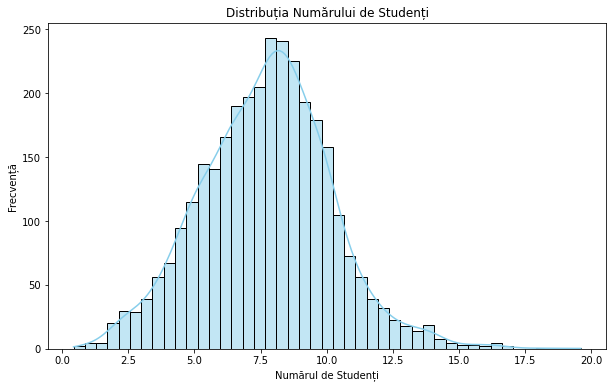

In [166]:
var = "stud_personnel"
# Desenați histograma pentru distribuția datelor
plt.figure(figsize=(10, 6))
sns.histplot(df[var], kde=True, color='skyblue')
plt.title('Distribuția Numărului de Studenți')
plt.xlabel('Numărul de Studenți')
plt.ylabel('Frecvență')

In [167]:
df.stud_personnel.describe()

count    3156.000000
mean        7.714617
std         2.466898
min         0.428571
25%         6.090909
50%         7.797731
75%         9.260697
max        19.600000
Name: stud_personnel, dtype: float64

In [168]:
descriptive_statistics(df, var)

Descriptive statistics for stud_personnel:


{'median': 7.797731217455988,
 'mode': 8.0,
 'skewness': 0.19954662114523888,
 'kurtosis': 0.6062443985577266,
 'shapiro_stat': 0.993380069732666,
 'shapiro_p_value': 7.996538847754309e-11}

### BOXPLOT

<Axes: xlabel='stud_personnel'>

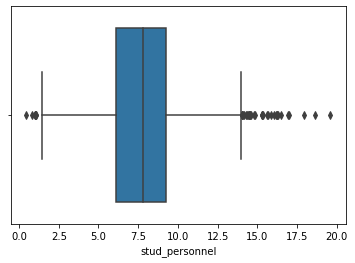

In [189]:
var = 'stud_personnel'
sns.boxplot(x=var, data=df)


### KERNEL DENSITY PLOT

continuous probability density curve 

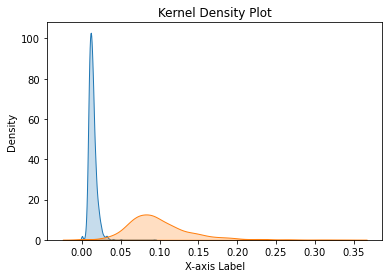

In [193]:
sns.kdeplot(df['personnel_pop'], fill=True, label='Personal/Populatie')
sns.kdeplot(df['stud_pop'], fill=True, label='Studenti/Populatie')

plt.title('Kernel Density Plot')
#plt.xlabel('X-axis Label')
plt.ylabel('Density')
plt.show()

### VIOLIN PLOT

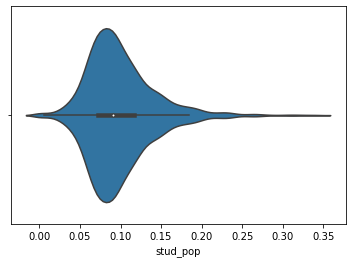

In [196]:
sns.violinplot(x='stud_pop', data=df)

# Show the plot
plt.show()

### ECDF 

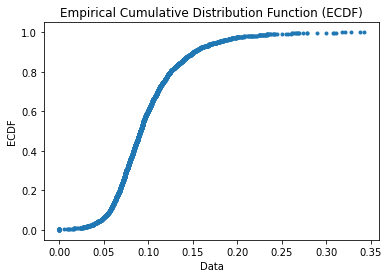

In [202]:

# Calculate ECDF
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# Plot ECDF
x, y = ecdf(df['stud_pop'])
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Data')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (ECDF)')

plt.show()

### RUG PLOT

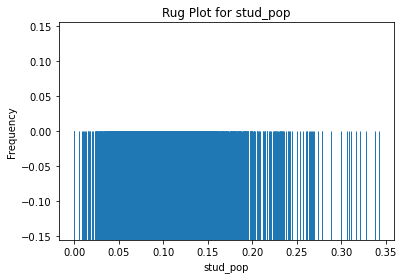

In [207]:
# Create a rug plot
var  = 'stud_pop'

sns.rugplot(data=df, x=var, height=0.5)

# Set plot labels and title
plt.xlabel('stud_pop')
plt.ylabel('Frequency')
plt.title('Rug Plot for ' + var)

# Show the plot
plt.show()

### VIOLIN PLOT

Text(0.5, 1.0, 'Violin Plot for stud_pop')

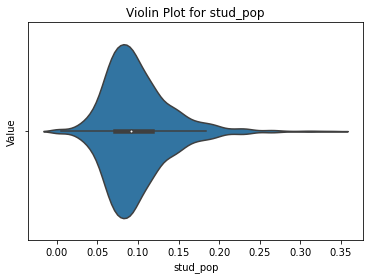

In [210]:
# Assuming df is your DataFrame and 'var' is the column you want to visualize
var = 'stud_pop'

# Create a violin plot
sns.violinplot(data=df, x=var)

# Set plot labels and title
plt.xlabel(var)
plt.ylabel('Value')  # Adjust ylabel accordingly
plt.title('Violin Plot for ' + var)

In [212]:
df.columns

Index(['SIRUTA', 'studyFormationsCount', 'studentsCount', 'personnelCount',
       'school_no', 'county', 'locality', 'propertyForm', 'Populatie',
       'stud_pop', 'personnel_pop', 'stud_personnel', 'school_category',
       'REGIUNEA', 'MACROREGIUNEA'],
      dtype='object')

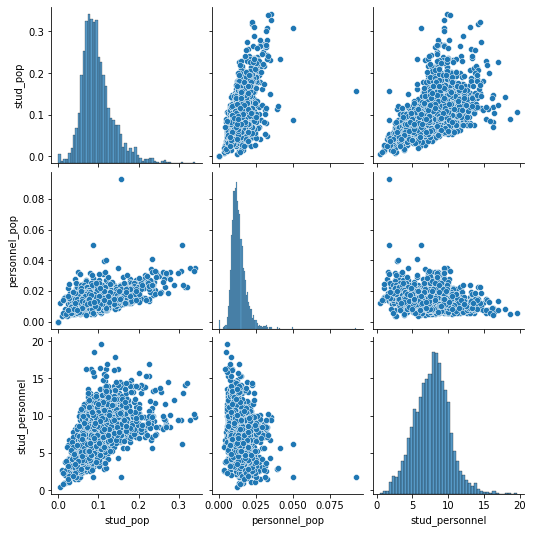

## TABELE DE CONTINGENTA


-imagine clară a modului în care distribuția unei variabile este legată de distribuția celeilalte variabile.

- Sunt utilizate pentru analiza relațiilor dintre variabilele categorice. Acestea sunt potrivite pentru măsurarea frecvențelor sau distribuțiilor conjuncte ale diferitelor categorii. 
    - vs Analiza Corelațiilor: Se concentrează pe relațiile dintre variabilele continue. Aceasta măsoară gradele de asociere  sau dependență între valorile numerice ale variabilelor.
    
MASURAREA ASOCIERII

- Tabelele de Contingență: Folosesc măsuri precum testul Chi-Pătrat pentru a determina dacă există asocieri semnificative între variabilele categorice.
    - Analiza Corelațiilor: Folosește coeficienți de corelație, cum ar fi coeficientul Pearson, pentru a cuantifica direcția și puterea relațiilor dintre variabilele continue.
    
SCOPUL ANALIZEI

- Sunt utilizate pentru a înțelege distribuțiile conjuncte, asocierea și independența dintre categoriile variabilelo
    - Analiza Corelațiilor: Se concentrează pe evaluarea gradului și direcției de schimbare simultană între două variabile continue.
    
REPREZENTARE VIZUALA

- Tabelele de Contingență: Sunt reprezentate sub formă de tabele bidimensionale, cu frecvențe pentru fiecare combinație de categorii.
    - Analiza Corelațiilor: Poate implica grafice, cum ar fi diagramele de dispersie, pentru a ilustra relațiile dintre variabilele continue.



CORETATIE sau ASOCIERE

Corelație:

Definiție: Corelația măsoară gradul de relație liniară între două variabile continue.
Natură: Este utilizată în principal pentru variabile continue, cum ar fi vârsta, înălțimea, greutatea etc.
Valorile de Măsură: Se exprimă printr-un coeficient de corelație, cum ar fi coeficientul de corelație Pearson.
Gama de Valori: Variază între -1 și 1, unde -1 indică o corelație negativă perfectă, 1 indică o corelație pozitivă perfectă, iar 0 indică lipsa unei corelații.
Asociere (Analiza de Asociație):

Definiție: Analiza de asociere explorează relațiile între variabile, dar nu este limitată la cele continue; se aplică și la variabilele categorice.
Natură: Poate fi utilizată pentru variabile atât continue, cât și categorice, și analizează dacă există dependențe între ele.
Valorile de Măsură: Se folosesc metode precum tabelele de contingenta, testele chi-pătrat etc.
Gama de Valori: Indicatori precum valorile p de la testele de asociație nu sunt limitați între -1 și 1; aceștia exprimă probabilități.

In [171]:
df.columns

Index(['SIRUTA', 'studyFormationsCount', 'studentsCount', 'personnelCount',
       'school_no', 'county', 'locality', 'propertyForm', 'Populatie',
       'stud_pop', 'personnel_pop', 'stud_personnel'],
      dtype='object')

In [172]:
df.school_no.describe()

count    3171.000000
mean        5.964995
std        14.877259
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max       657.000000
Name: school_no, dtype: float64

In [173]:
# Definim intervalele pentru categorii
bins = [0, 3, 6, 10, float('inf')]  # float('inf') reprezintă infinitul

# Numele categoriilor
categories = ['Minim', 'Mediu', 'Peste mediu', 'Maxim']

# Adaugăm coloana cu categoriile
df['school_category'] = pd.cut(df['school_no'], bins=bins, labels=categories, right=False)

# Afișăm rezultatul
df.tail()

,SIRUTA,studyFormationsCount,studentsCount,personnelCount,school_no,county,locality,propertyForm,Populatie,stud_pop,personnel_pop,stud_personnel,school_category
3166,180037,9.0,294,38,3,SALAJ,BOGHIŞ,1,1937.0,0.151781,0.019618,7.736842,Mediu
3167,180046,9.0,233,26,2,IALOMITA,GURA IALOMIŢEI,1,2544.0,0.091588,0.010220,8.961538,Minim
3168,180055,6.0,174,25,2,CALARASI,CRIVĂŢ,1,1943.0,0.089552,0.012867,6.960000,Minim
3169,180064,26.0,535,33,1,IALOMITA,BĂRBULEŞTI,1,7669.0,0.069761,0.004303,16.212121,Minim
3170,180091,7.0,139,23,2,SATU MARE,RACSA VII,1,2989.0,0.046504,0.007695,6.043478,Minim


In [174]:
dictionar_regiuni = pd.read_csv('dictionar_regiuni.csv')
dictionar_regiuni.columns

Index(['JUDET', 'REGIUNEA', 'MACROREGIUNEA'], dtype='object')

In [175]:
dictionar_regiuni.rename(columns = {'JUDET':'county'}, inplace = True)
# Presupunând că df este DataFrame-ul tău și dictionary_regiuni este DataFrame-ul cu informațiile despre regiuni
df = pd.merge(df, dictionar_regiuni, on='county', how='left')
df.head(3)

,SIRUTA,studyFormationsCount,studentsCount,personnelCount,school_no,county,locality,propertyForm,Populatie,stud_pop,personnel_pop,stud_personnel,school_category,REGIUNEA,MACROREGIUNEA
0,1017,11.519231,13412,1711,52,ALBA,ALBA IULIA,2,74802.0,0.179300,0.022874,7.838691,Maxim,CENTRU,1
1,1071,3.000000,313,37,7,ALBA,CIUGUD,1,3084.0,0.101492,0.011997,8.459459,Peste mediu,CENTRU,1
2,1151,14.333333,681,121,3,ALBA,ABRUD,1,5293.0,0.128660,0.022860,5.628099,Mediu,CENTRU,1


### TABEL DE CONTINGENTA

In [231]:
# Crearea tabelului de contingenta
contingency_table = pd.crosstab(df['MACROREGIUNEA'],df['school_category'])

# Afișarea tabelului de contingenta
print("Tabel de Contingenta:")
print(contingency_table)

Tabel de Contingenta:
school_category  Minim  Mediu  Peste mediu  Maxim
MACROREGIUNEA                                    
1                  210    352          203     94
2                  228    335          149     53
3                  179    267          120     40
4                  174    417          244    106


In [232]:
# Calcularea procentajelor relative pe coloane (axis=1)
relative_percentages = contingency_table.apply(lambda row: row / row.sum() * 100, axis=1)

# Vizualizarea tabelului de procentaje relative
print(relative_percentages)

school_category      Minim      Mediu  Peste mediu      Maxim
MACROREGIUNEA                                                
1                24.447031  40.977881    23.632130  10.942957
2                29.803922  43.790850    19.477124   6.928105
3                29.537954  44.059406    19.801980   6.600660
4                18.490967  44.314559    25.929862  11.264612


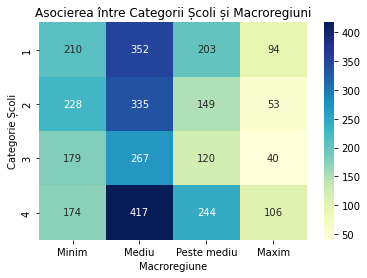

In [233]:
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Asocierea între Categorii Școli și Macroregiuni')
plt.xlabel('Macroregiune')
plt.ylabel('Categorie Școli')
plt.show()

Text(33.0, 0.5, 'Categorie Școli')

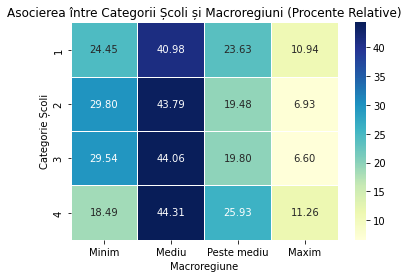

In [235]:
sns.heatmap(relative_percentages, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True, linewidths=.5)
plt.title('Asocierea între Categorii Școli și Macroregiuni (Procente Relative)')
plt.xlabel('Macroregiune')
plt.ylabel('Categorie Școli')



In [181]:
df.columns

Index(['SIRUTA', 'studyFormationsCount', 'studentsCount', 'personnelCount',
       'school_no', 'county', 'locality', 'propertyForm', 'Populatie',
       'stud_pop', 'personnel_pop', 'stud_personnel', 'school_category',
       'REGIUNEA', 'MACROREGIUNEA'],
      dtype='object')

### CHI SQUARE TEST

In [241]:
from scipy.stats import chi2_contingency
# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 55.874978910124405
P-value: 8.293041295931028e-09


- Valoarea chi-square de 55,87 și p-value-ul foarte mic (8,29e-09) sugerează că există o asociere statistic semnificativă între variabilele 'school_category' și 'MACROREGIUNEA'.
- P-value-ul mic indică faptul că asocierea observată în tabelul de contingenta este puțin probabil să fi apărut întâmplător.
- categoria școlii și macroregiunea nu sunt independente una de cealaltă.

### CRAMER'S V

-puterea asocierii : 0 indică o asociere slabă, în timp ce 1 indică o asociere puternică.

In [248]:
# Function to calculate Cramers' V
def cramers_v(chi_stat, N, minimum_dimension):
    return np.sqrt((chi_stat/N) / minimum_dimension)

'''chi_stat: Statistica Chi-square obținută din testul Chi-square al tabelei de contingenta.
N: Dimensiunea totală a eșantionului.
minimum_dimension: Dimensiunea minimă dintre numărul de rânduri și coloane din tabelul de contingenta.'''


# Calculate Cramer's V
cramers_v_coef = cramers_v(chi2, df.shape[0], min(contingency_table.shape)-1)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Cramer's V coefficient: {cramers_v_coef}")

Chi-square value: 55.874978910124405
P-value: 8.293041295931028e-09
Cramer's V coefficient: 0.07663901912612647


## ANALIZA DE CORELATIE


Pearson Correlation
- Measures the linear relationship between two continuous variables.
- Ranges from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a

### CORRELATION MATRIX

#### CORELATION COEFICIENT

COEFICIENTUL PEARSON 
- Măsoară relația liniară între două variabile continue.
- Variază între -1 și 1, unde# Selectarea unei perechi de variabile pentru analiza corelației
var1 = 'studentsCount'
var2 = 'personnelCount'

# Calculul coeficientului de corelație Pearson
correlation_coefficient = df[var1].corr(df[var2])

print(f'Coeficientul de corelație între {var1} și {var2}: {correlation_coefficient}') 1 indică o relație liniară pozitivă perfectă, -1 indică o relație liniară negativă perfectă, iar 0 indică lipsa unei relații lineare.
- Presupune că variabilele au o distribuție normală.

In [263]:
# Selectarea unei perechi de variabile pentru analiza corelației
var1 = 'studentsCount'
var2 = 'personnelCount'

# Calculul coeficientului de corelație Pearson
correlation_coefficient = df[var1].corr(df[var2])

print(f'Coeficientul de corelație între {var1} și {var2}: {correlation_coefficient}')

Coeficientul de corelație între studentsCount și personnelCount: 0.998026203704121


### MATRICEA DE CORELATIE

In [255]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])
numerical_df.drop( columns = ['SIRUTA','MACROREGIUNEA'], inplace = True)

# Calculate the correlation matrix for numerical variables
correlation_matrix = numerical_df.corr()

In [238]:
# Calculul matricei de corelație
correlation_matrix = df.corr()

<ipython-input-238-055eec670480>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [256]:
correlation_matrix 

,studyFormationsCount,studentsCount,personnelCount,school_no,propertyForm,Populatie,stud_pop,personnel_pop,stud_personnel
studyFormationsCount,1.000000,0.204734,0.207514,0.148775,0.279825,0.180111,0.362582,0.159831,0.245399
studentsCount,0.204734,1.000000,0.998026,0.979590,0.344091,0.993217,0.171682,0.109177,0.068430
personnelCount,0.207514,0.998026,1.000000,0.982660,0.356910,0.988136,0.170989,0.124154,0.051199
school_no,0.148775,0.979590,0.982660,1.000000,0.392019,0.967963,0.206027,0.133776,0.079241
propertyForm,0.279825,0.344091,0.356910,0.392019,1.000000,0.303060,0.332423,0.216073,0.134286
Populatie,0.180111,0.993217,0.988136,0.967963,0.303060,1.000000,0.124305,0.067782,0.062190
stud_pop,0.362582,0.171682,0.170989,0.206027,0.332423,0.124305,1.000000,0.567618,0.545794
personnel_pop,0.159831,0.109177,0.124154,0.133776,0.216073,0.067782,0.567618,1.000000,-0.301953
stud_personnel,0.245399,0.068430,0.051199,0.079241,0.134286,0.062190,0.545794,-0.301953,1.000000


In [239]:
correlation_matrix

,SIRUTA,studyFormationsCount,studentsCount,personnelCount,school_no,propertyForm,Populatie,stud_pop,personnel_pop,stud_personnel,MACROREGIUNEA
SIRUTA,1.000000,0.010823,0.011492,0.009870,-0.006364,-0.019153,0.014392,-0.025064,-0.036926,0.014708,0.119575
studyFormationsCount,0.010823,1.000000,0.204734,0.207514,0.148775,0.279825,0.180111,0.362582,0.159831,0.245399,-0.055201
studentsCount,0.011492,0.204734,1.000000,0.998026,0.979590,0.344091,0.993217,0.171682,0.109177,0.068430,0.009916
personnelCount,0.009870,0.207514,0.998026,1.000000,0.982660,0.356910,0.988136,0.170989,0.124154,0.051199,0.005182
school_no,-0.006364,0.148775,0.979590,0.982660,1.000000,0.392019,0.967963,0.206027,0.133776,0.079241,0.009908
propertyForm,-0.019153,0.279825,0.344091,0.356910,0.392019,1.000000,0.303060,0.332423,0.216073,0.134286,-0.015648
Populatie,0.014392,0.180111,0.993217,0.988136,0.967963,0.303060,1.000000,0.124305,0.067782,0.062190,0.015826
stud_pop,-0.025064,0.362582,0.171682,0.170989,0.206027,0.332423,0.124305,1.000000,0.567618,0.545794,-0.024796
personnel_pop,-0.036926,0.159831,0.109177,0.124154,0.133776,0.216073,0.067782,0.567618,1.000000,-0.301953,-0.173272
stud_personnel,0.014708,0.245399,0.068430,0.051199,0.079241,0.134286,0.062190,0.545794,-0.301953,1.000000,0.160314


### VIZUALIZAREA CORELATIEI

#### MATRICEA DE CORELATIE

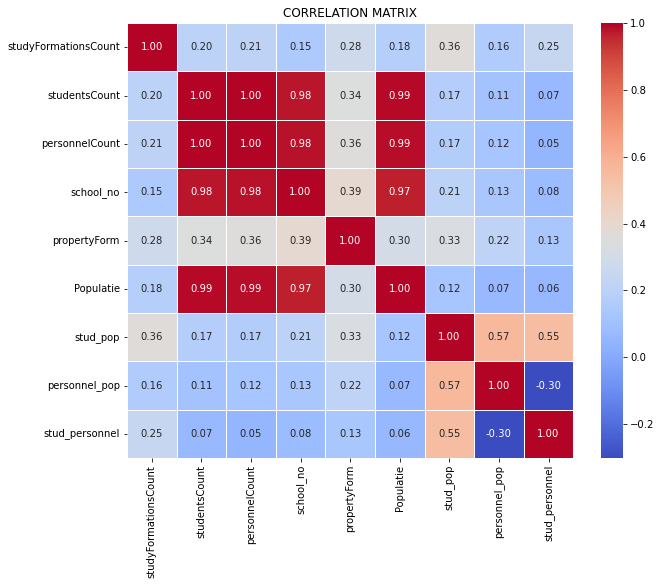

In [258]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("CORRELATION MATRIX")
# Display the heatmap
plt.show()


#### SCATTER PLOT

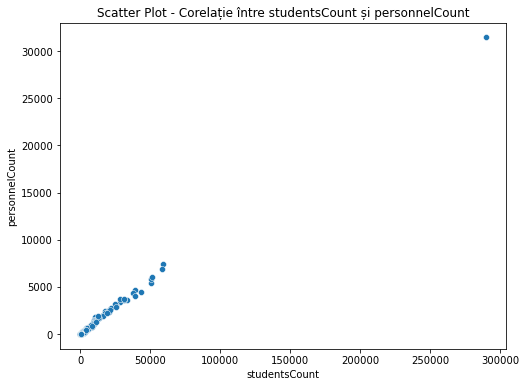

In [268]:
# Variații ale datelor
var1 = 'studentsCount'
var2 = 'personnelCount'

# Creare scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=var1, y=var2)
plt.title('Scatter Plot - Corelație între studentsCount și personnelCount')
plt.xlabel('studentsCount')
plt.ylabel('personnelCount')
plt.show()

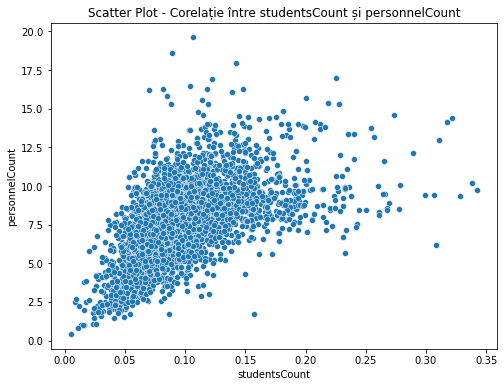

In [270]:
# Variații ale datelor
var1 = 'stud_pop'
var2 = 'stud_personnel'

# Creare scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=var1, y=var2)
plt.title('Scatter Plot - Corelație între studentsCount și personnelCount')
plt.xlabel('studentsCount')
plt.ylabel('personnelCount')
plt.show()

### PAIR PLOT

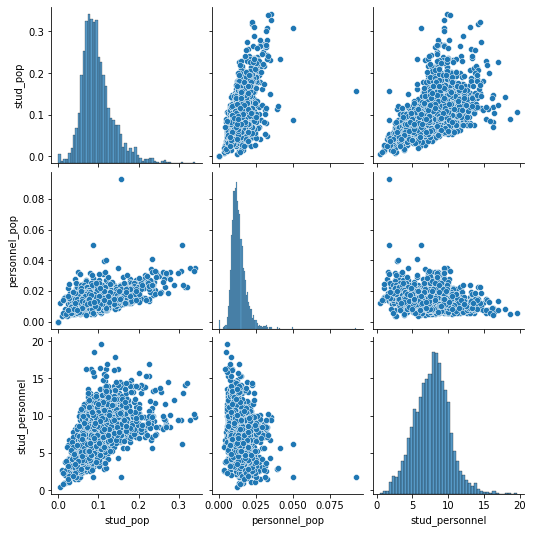

In [214]:
df_section = df[['stud_pop', 'personnel_pop', 'stud_personnel']]
sns.pairplot(df_section)

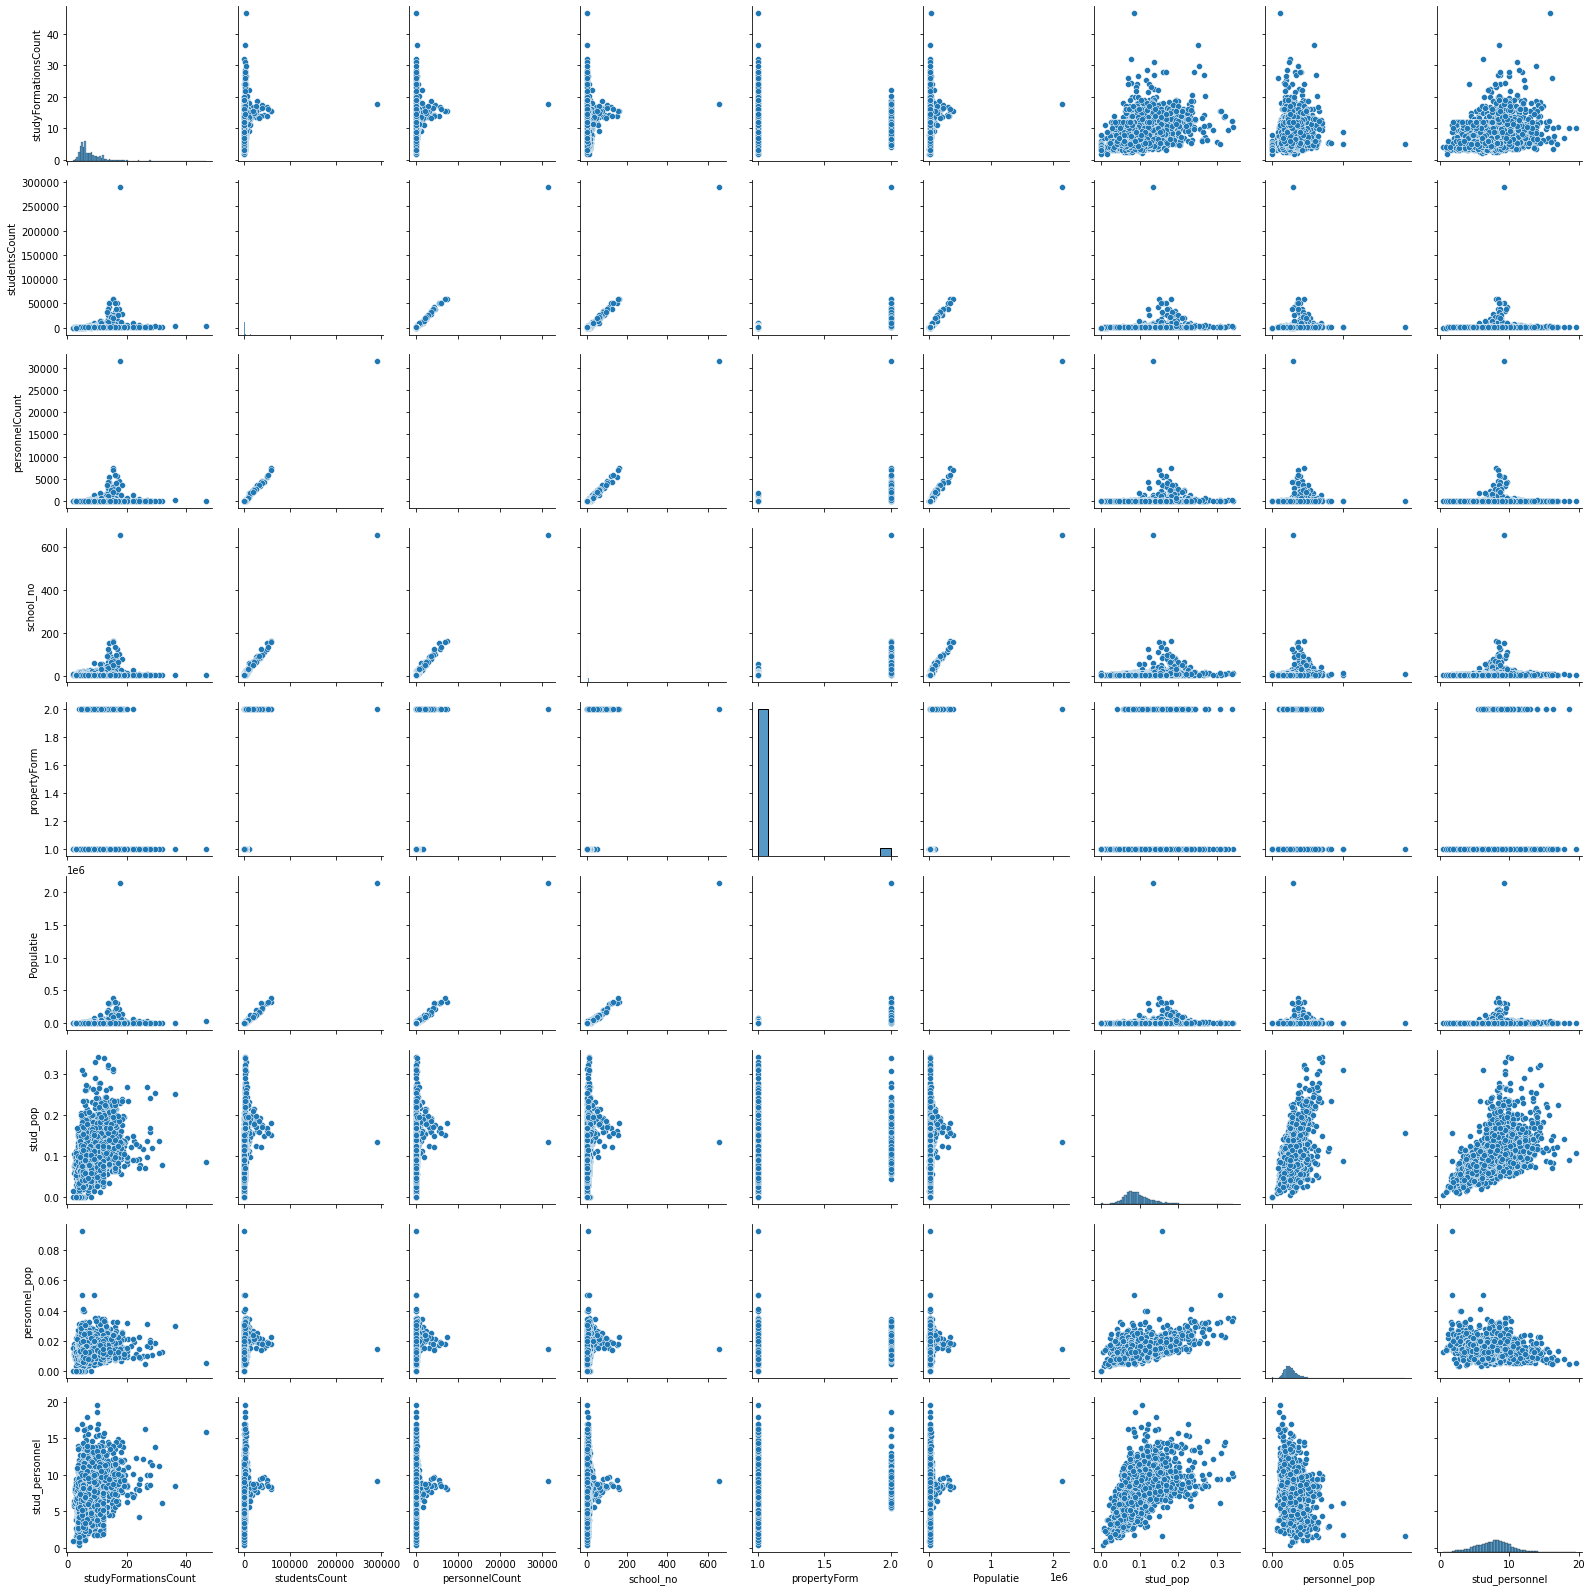

In [267]:
sns.pairplot(numerical_df)

In [273]:
df.columns

Index(['SIRUTA', 'studyFormationsCount', 'studentsCount', 'personnelCount',
       'school_no', 'county', 'locality', 'propertyForm', 'Populatie',
       'stud_pop', 'personnel_pop', 'stud_personnel', 'school_category',
       'REGIUNEA', 'MACROREGIUNEA'],
      dtype='object')

In [277]:
df.dtypes

SIRUTA                     int64
studyFormationsCount     float64
studentsCount              int64
personnelCount             int64
school_no                  int64
county                    object
locality                  object
propertyForm               int64
Populatie                float64
stud_pop                 float64
personnel_pop            float64
stud_personnel           float64
school_category         category
REGIUNEA                  object
MACROREGIUNEA              int64
dtype: object

### LINIAR REGRESSION



- Ipoteza Nulă (H0):
Nu există nicio relație semnificativă între variabilele independente (county și personnel_pop) și variabila dependentă (stud_pop).

- Ipoteza Alternativă (H1):
Există o relație semnificativă între cel puțin o dintre variabilele independente și variabila dependentă.

- Interpretare:
Dacă valoarea p asociată variabilelor independente (county și personnel_pop) este semnificativ mai mică decât un anumit prag (de obicei 0.05), atunci se respinge ipoteza nulă.
Acest lucru ar indica faptul că cel puțin o variabilă independentă are o influență semnificativă asupra variabilei dependente.
Coeficienții pentru variabilele independente din rezumatul modelului vor indica direcția și mărimea acestei influențe.

In [279]:
import statsmodels.api as sm

X = df[['personnel_pop', 'personnel_pop']]
y = df['stud_pop']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               stud_pop   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     1506.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          6.12e-270
Time:                        17:04:54   Log-Likelihood:                 6187.7
No. Observations:                3171   AIC:                        -1.237e+04
Df Residuals:                    3169   BIC:                        -1.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0356      0.002     20.548

In [280]:

# Assuming df is your DataFrame
X = df[['personnel_pop', 'personnel_pop']]
# Adding dummy variables for the 'county' variable
X = pd.get_dummies(df['county'], drop_first=True).join(X)
y = df['stud_pop']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               stud_pop   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     53.86
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:07:20   Log-Likelihood:                 6433.8
No. Observations:                3171   AIC:                        -1.278e+04
Df Residuals:                    3128   BIC:                        -1.252e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0131      0.004     